In [94]:
import os
import pandas as pd

In [95]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [96]:
csv_path = os.path.join('data', 'data.csv')
data = pd.read_csv(csv_path)

In [97]:
data.head()

,p,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,1,no,0,0,0,0.000,0,1,0,0.590,17,2,0,1,1,0,0,1,0.410
1,2,no,0,0,0,0.000,0,1,0,0.901,17,2,0,1,1,0,0,1,0.099
2,3,no,0,0,0,0.000,0,1,0,0.899,17,2,0,1,1,0,0,1,0.101
3,4,no,0,0,0,0.000,0,1,0,0.641,17,2,0,1,1,0,0,1,0.359
4,5,no,0,0,0,0.000,0,1,0,0.598,17,2,0,1,1,0,0,1,0.402


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   p       1048575 non-null  int64  
 1   target  1048575 non-null  object 
 2   f0      1048575 non-null  int64  
 3   f1      1048575 non-null  int64  
 4   f2      1048575 non-null  int64  
 5   f3      1048575 non-null  float64
 6   f4      1048575 non-null  int64  
 7   f5      1048575 non-null  int64  
 8   f6      1048575 non-null  int64  
 9   f7      1048575 non-null  float64
 10  f8      1048575 non-null  int64  
 11  f9      1048575 non-null  int64  
 12  f10     1048575 non-null  int64  
 13  f11     1048575 non-null  int64  
 14  f12     1048575 non-null  int64  
 15  f13     1048575 non-null  int64  
 16  f14     1048575 non-null  int64  
 17  f15     1048575 non-null  int64  
 18  f16     1048575 non-null  float64
dtypes: float64(3), int64(15), object(1)
memory usage: 152.0+ MB


In [99]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['target'] = label_encoder.fit_transform(data['target'])

In [100]:
data.describe()

,p,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,524288.000,0.017,8.502,0.919,0.157,0.519,1.381,1.245,4.221,0.743,12.483,3.394,9.299,0.721,0.721,1.484,2.300,2.165,0.257
std,302697.674,0.129,30.856,2.447,2.231,0.419,12.016,0.578,11.796,0.230,13.221,2.123,32.411,0.449,0.449,2.538,13.466,2.513,0.230
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,262144.500,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.577,6.000,2.000,0.000,0.000,0.000,0.000,0.000,1.000,0.051
50%,524288.000,0.000,0.000,1.000,0.000,0.615,0.000,1.000,0.000,0.796,9.000,2.000,1.000,1.000,1.000,2.000,1.000,2.000,0.204
75%,786431.500,0.000,4.000,1.000,0.000,0.967,1.000,1.000,4.000,0.949,14.000,6.000,5.000,1.000,1.000,2.000,2.000,3.000,0.423
max,1048575.000,1.000,255.000,255.000,255.000,1.000,255.000,8.000,255.000,1.000,238.000,7.000,255.000,1.000,1.000,255.000,510.000,256.000,1.000


In [101]:
data.nunique().sort_values()

target          2
f12             2
f11             2
f5              7
f9              8
f1             64
f13            64
f2             68
f15            74
f8            115
f4            173
f6            180
f14           213
f0            255
f10           256
f3          34714
f7          73874
f16         73874
p         1048575
dtype: int64

In [102]:
data['target'].value_counts()

target
0    1030822
1      17753
Name: count, dtype: int64

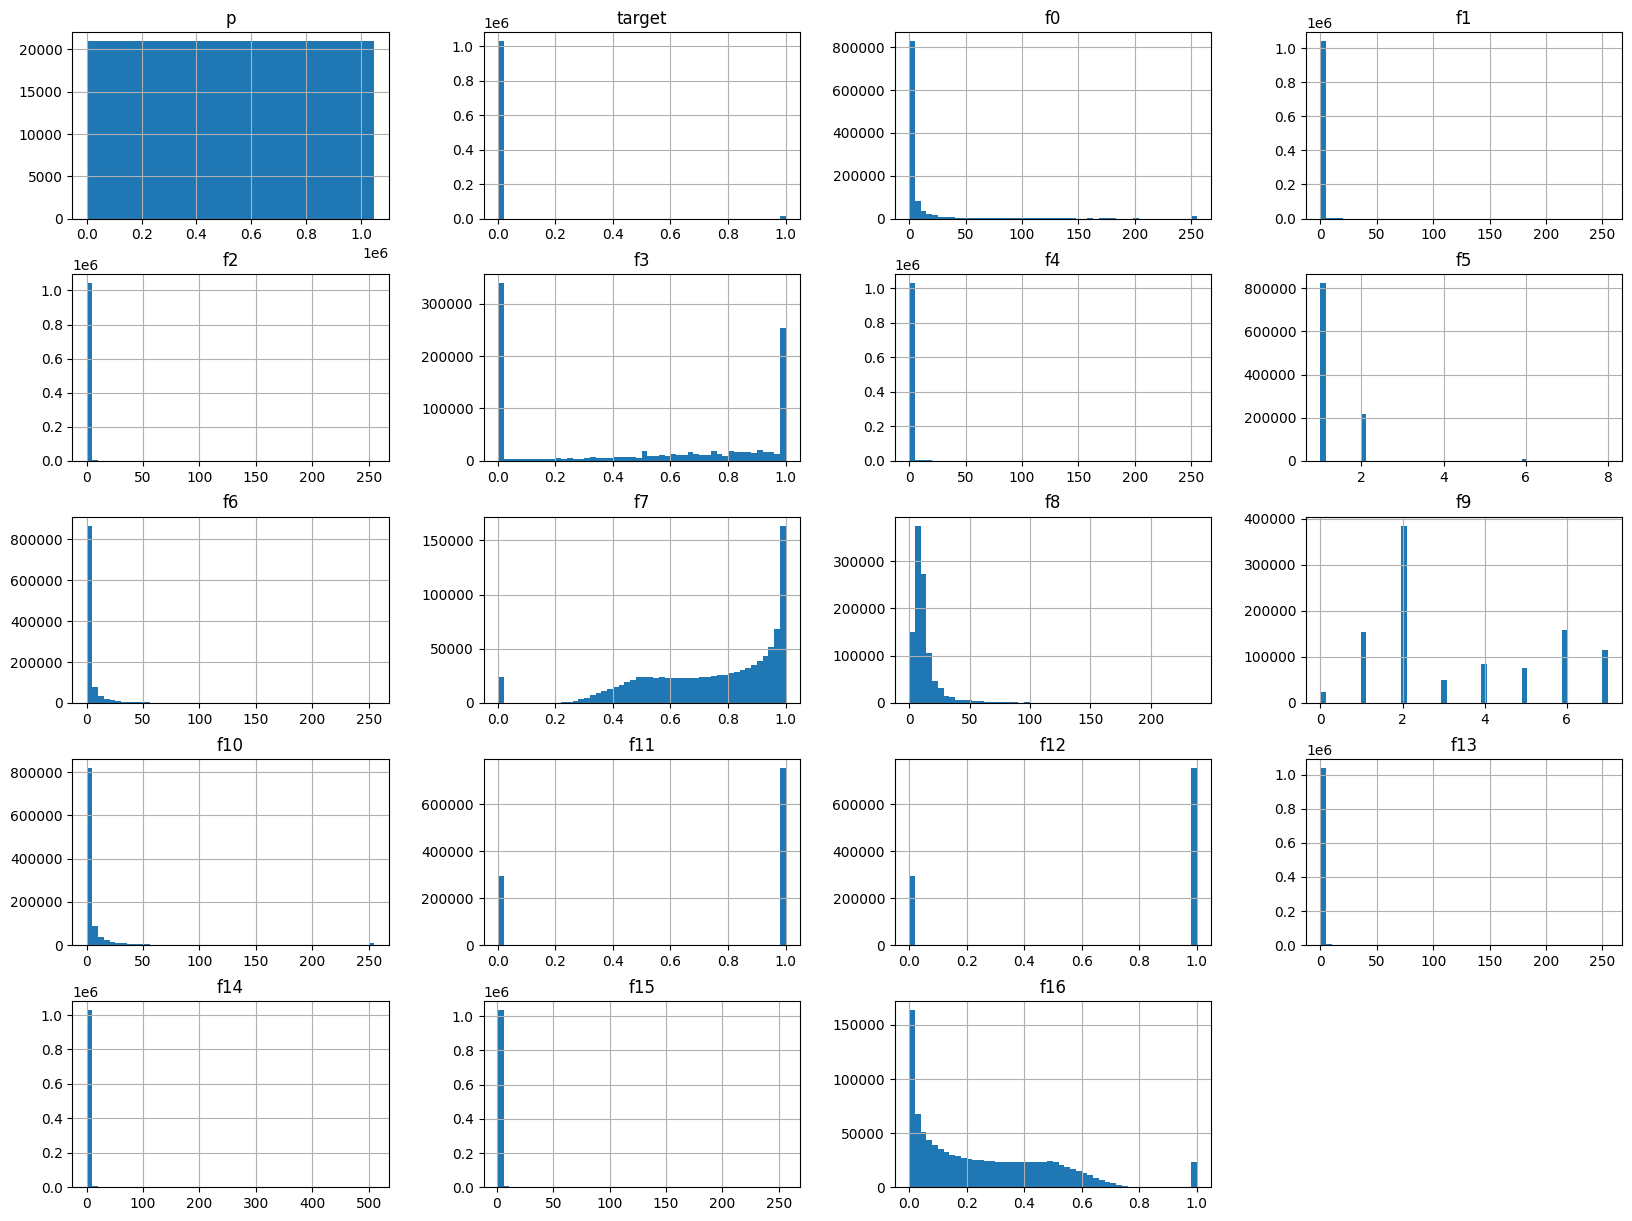

In [103]:
from matplotlib import pyplot as plt

data.hist(bins=50, figsize=(20, 15))
plt.show()

In [104]:
X = data.drop(columns=['p', 'target'])
y = data['target']

In [105]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = pd.Series(y, name='target')

In [106]:
from sklearn.model_selection import train_test_split

test_size_ratio = 0.2
X_train, _, y_train, _ = train_test_split(
    X, y,
    test_size=test_size_ratio, 
    stratify=y, 
    random_state=42
)
train = pd.concat([y_train, X_train], axis=1)

train.shape

(838860, 18)

In [107]:
new_train = train.drop_duplicates()
print("Duplicates removed:", train.shape[0] - new_train.shape[0])
train = new_train

train.shape

Duplicates removed: 61923


(776937, 18)

In [108]:
new_train = train.drop_duplicates(subset=train.columns.difference(['target']))
print("Collisions removed:", train.shape[0] - new_train.shape[0])
train = new_train

train.shape

Collisions removed: 56


(776881, 18)

In [109]:
(train["f16"] + train["f7"] != 1.0).sum()

0